# Problem Statement
<b>find Accuracy on all Three Methods (GaussianNB, MultinomialNB & BernoulliNB) on different Test Size and plot in on Bar Graph </b>
Train Data : TestData= 80:20, & 70:30

In [ ]:
from sklearn.datasets import load_breast_cancer #for importing breast_cancer.csv 
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB #importing Gaussian model from Naive Bayes algorithem
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

[92.98245614035088, 95.32163742690058]
[85.96491228070175, 90.64327485380117]
[54.385964912280706, 66.08187134502924]


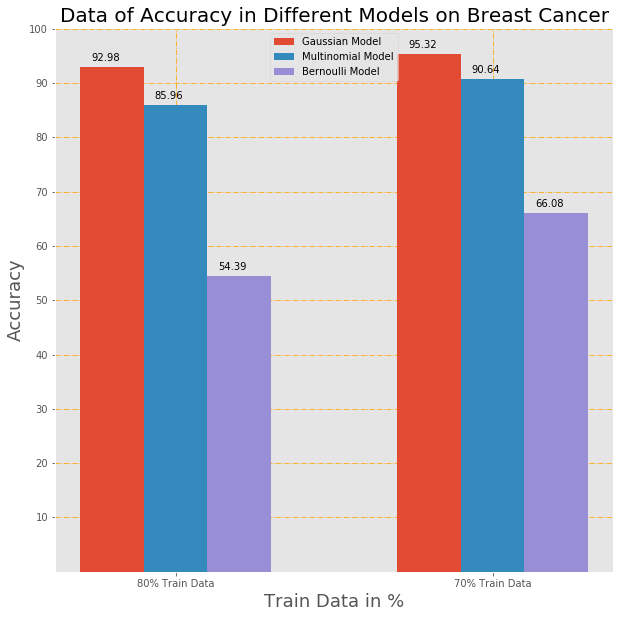

In [19]:
dataset=load_breast_cancer() #prebbuild function in sklearn
x=dataset.data #deciding data
y=dataset.target #decideing target


list_train=[.20,.30] #list to use diffrent test_size data 
gnb_model=GaussianNB() #model for Gaussian Method
mn_model=MultinomialNB() #model for Multinomial Method
b_model=BernoulliNB() #model for Bernouli Method
accuracy_gnb=[] #empty list to store accuracy on Gaussian Method
accuracy_mn=[] #empty list to store accuracy on Multinomial Method
accuracy_b=[] #empty list to store accuracy on Bernouli Method

for i in range(len(list_train)):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=list_train[i])
    gnb_model.fit(xtrain,ytrain)
    y_gnb_pred=gnb_model.predict(xtest)
    mn_model.fit(xtrain,ytrain)
    y_mn_pred=mn_model.predict(xtest)
    b_model.fit(xtrain,ytrain)
    y_b_pred=b_model.predict(xtest)
    
    #appending accuracy in list on diffrent train data 
    accuracy_gnb.append(gnb_model.score(xtest,ytest)*100)  
    accuracy_mn.append(mn_model.score(xtest,ytest)*100)
    accuracy_b.append(b_model.score(xtest,ytest)*100)
    
#accuracy list print just to check
print(accuracy_gnb)
print(accuracy_mn)
print(accuracy_b)


#creating graph
list_x=['80% Train Data','70% Train Data']



width=0.20 #bar width
x=np.arange(len(list_x)) # the label locations


plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax=plt.subplot(111)
g_bar=ax.bar(x,accuracy_gnb,width,label='Gaussian Model')
mn_bar=ax.bar(x+width,accuracy_mn,width,label='Multinomial Model')
b_bar=ax.bar(x+width*2,accuracy_b,width,label='Bernoulli Model')
ax.set_ylabel("Accuracy",size=18)
ax.set_yticks(range(10,110,10))
ax.set_xticks(x+width)
ax.set_xticklabels(list_x,size=10)
ax.set_xlabel("Train Data in %",size=18)
ax.set_title("Data of Accuracy in Different Models on Breast Cancer",size=20)
ax.grid(True,linestyle='-.',color='orange')
ax.legend(loc='upper center')


#creting function for auto label
def autolabel(rect):
    for i,text in enumerate (rect):
        ax.annotate('{0:0.2f}'.format(rect[i].get_height()),
                    xy=(rect[i].get_x(),rect[i].get_height()),
                    xytext=(25,4),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    
#auto labeling
autolabel(g_bar)
autolabel(mn_bar)
autolabel(b_bar)

plt.show()
    